In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
data = pd.read_csv("/kaggle/input/weather-prediction/seattle-weather.csv")
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [3]:
data = data.drop(['date'], axis=1)

In [4]:
print(data.isnull().sum())

precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64


In [5]:
print(data["weather"].unique())

['drizzle' 'rain' 'sun' 'snow' 'fog']


In [6]:
oh = OneHotEncoder()
encoded = oh.fit_transform(data[['weather']]).toarray()
encoded

array([[1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

In [7]:
oh.get_feature_names_out(['weather'])

array(['weather_drizzle', 'weather_fog', 'weather_rain', 'weather_snow',
       'weather_sun'], dtype=object)

In [8]:
encoded_df = pd.DataFrame(encoded, columns = oh.get_feature_names_out(['weather']))
encoded_df

,weather_drizzle,weather_fog,weather_rain,weather_snow,weather_sun
0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
1456,0.0,0.0,1.0,0.0,0.0
1457,0.0,0.0,1.0,0.0,0.0
1458,0.0,1.0,0.0,0.0,0.0
1459,0.0,0.0,0.0,0.0,1.0


In [9]:
data = pd.concat([data.drop('weather', axis=1), encoded_df], axis=1)
data

,precipitation,temp_max,temp_min,wind,weather_drizzle,weather_fog,weather_rain,weather_snow,weather_sun
0,0.0,12.8,5.0,4.7,1.0,0.0,0.0,0.0,0.0
1,10.9,10.6,2.8,4.5,0.0,0.0,1.0,0.0,0.0
2,0.8,11.7,7.2,2.3,0.0,0.0,1.0,0.0,0.0
3,20.3,12.2,5.6,4.7,0.0,0.0,1.0,0.0,0.0
4,1.3,8.9,2.8,6.1,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,0.0,0.0,1.0,0.0,0.0
1457,1.5,5.0,1.7,1.3,0.0,0.0,1.0,0.0,0.0
1458,0.0,7.2,0.6,2.6,0.0,1.0,0.0,0.0,0.0
1459,0.0,5.6,-1.0,3.4,0.0,0.0,0.0,0.0,1.0


In [10]:
X = data[['temp_max', 'temp_min', 'wind']]
y = data[['weather_drizzle', 'weather_fog', 'weather_rain', 'weather_snow', 'weather_sun']]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [12]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [13]:
model = Sequential([
    Dense(32, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(y_train.shape[1], activation='softmax')
    
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
history = model.fit(X_train,y_train, validation_data=(X_test, y_test), epochs=40, batch_size = 32)

Epoch 1/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1664 - mae: 0.3243 - val_loss: 0.1520 - val_mae: 0.3110
Epoch 2/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1483 - mae: 0.3062 - val_loss: 0.1335 - val_mae: 0.2873
Epoch 3/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1271 - mae: 0.2757 - val_loss: 0.1149 - val_mae: 0.2510
Epoch 4/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1136 - mae: 0.2431 - val_loss: 0.1060 - val_mae: 0.2238
Epoch 5/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1068 - mae: 0.2219 - val_loss: 0.1011 - val_mae: 0.2096
Epoch 6/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1045 - mae: 0.2101 - val_loss: 0.0974 - val_mae: 0.1985
Epoch 7/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1004 - mae: 0.2020 - val_loss: 0.0950 - val_mae: 0.1908
Epoch 8/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0973 - mae: 0.1948 - val_loss: 0.0940 - val_mae: 0.1856
Epoch 9/40
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0963 - mae: 

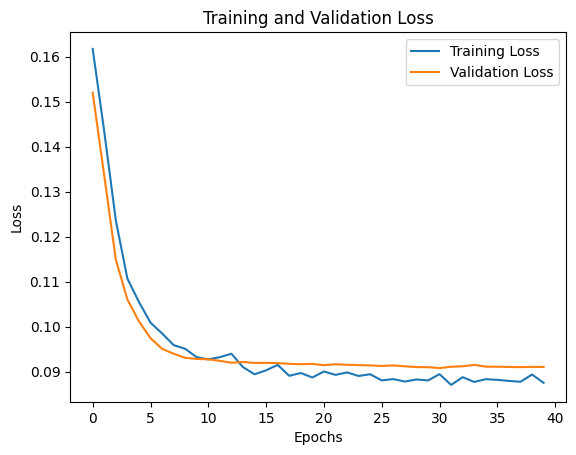

In [15]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()